# Linear Regression

Why are we learning linear regression?

    widely used , runs fast, easy to use (not a lot of tuning required), 
    highly interpretable, basis for many other methods


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [4]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
#Money is spent on Radio/TV/newspaper to sell items 1 to 5. Post Advt the sales are given.
#All in 1000's of dollars or 1000's of units of time
#Can we predict the sales of a product for a given market

In [6]:
# print number of examples
data.shape

(200, 4)

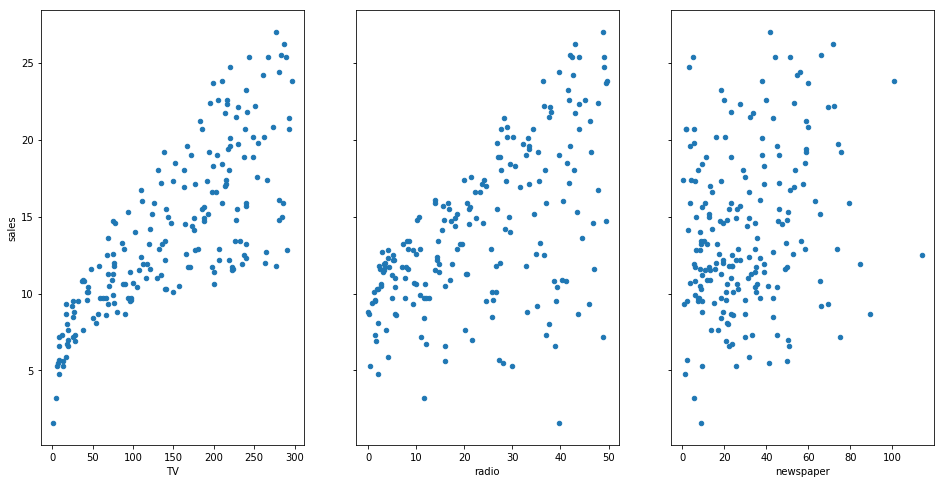

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

Questions that can be  asked

    Is there a relationship between ads and sales?
    How strong is that relationship?
    Which ad types contribute to sales?
    What is the effect of each ad type of sales?
    Given ad spending in a particular market, can sales be predicted?

Simple Linear Regression
y=ax+b
y - response variable, x single feature, b bias
Need to learn the co-efficients

In [9]:
# need to install statsmodels via pip3 install statsmodels --user

import statsmodels.formula.api as smf

# create a fitted model Sales for TV Ads
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [12]:
# Interpreting - Changing the spend on TV adds by a unit will increase sales by 0.047537
#ie. spend $1000 sales increases by $47.537
#if you spend $30000 on TV marketing what could be the expected sales?
#y=0.047537x + 7.032594
0.047537*30 + 7.032594

8.458704

This would mean 8458.704 units will be sold

In [15]:
#Repeat using functions. Create a dataframe and test
X_new = pd.DataFrame({'TV': [30]})
X_new.head()

,TV
0,30


In [16]:
lm.predict(X_new)

0    8.458693
dtype: float64

In [17]:
#Find the min and max values in the data and predict the sales for them and plot
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [18]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

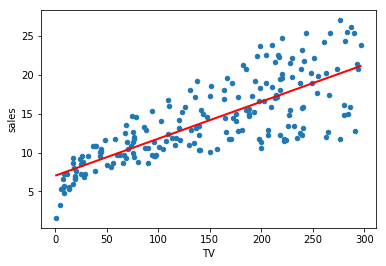

In [20]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

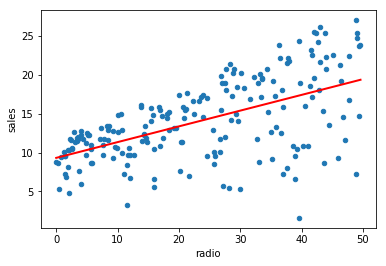

In [24]:
# Now try with other variables one by one

lm = smf.ols(formula='sales ~ radio', data=data).fit()
# print the coefficients
lm.params
X_new = pd.DataFrame({'radio': [data.radio.min(), data.radio.max()]})
X_new.head()

# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

#plot the data
data.plot(kind='scatter', x='radio', y='sales')
plt.plot(X_new, preds, c='red', linewidth=2)

In [25]:
#how does the model fit the data? - 
#R-Squared test - The proportion of variance explained by the model 
#(Range of r-squared is  0 to 1) higher the better
lm.rsquared


0.33203245544529536

Is this good? Cant say exactly but use this to compare against different models

# Multiple Linear Regression

In [27]:
#Fit using all the parameters
#y=β0+β1×TV+β2×Radio+β3×Newspaper

lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [28]:
# print a summary of the fitted model
lm.summary()
#Rsquared - how much of the variance is explained by the model- 100% means all explained
#Adj - Rsquared - does adding an extra predictor improve the model - increases if yes,
#      else decreases
#F-Statistic - compare the 0-intercept model with current model and say if adding the features helps
#Prob-Fstatistic - check probability of  all the regression co-efficients being zero
#Akaike information criterion (AIC) - to measure quality of a model -
# - measures the information lost by model. - lower is better when comparing across models
# BIC - Bayesian Info Critera - to compare models - lower better across models

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Sep 2018   Prob (F-statistic):           1.58e-96
Time:                        23:17:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# co-efficients - positive for TV and Radio so spending on them improves sales,
#negative for newspaper
# model has higher R-squared value - so this is better than the model trained above.

## Feature Selection

In [34]:
#More features you add for prediction R-squared increases and 
#you may think the model is better. Ideally use adjusted-R-squared test
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.rsquared

0.611875050850071

In [35]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [36]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [37]:
#Redo with adjusted -R3
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.rsquared_adj

0.6099148238341623

In [39]:
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared_adj

0.8961505479974428

In [40]:
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared_adj

0.8956373316204668

# Linear Regression in scikit-learn

In [44]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

#you get the same values as from statsmodels

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [47]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

In [50]:
#predict for a new observation
print(lm.predict([100, 25, 25]))

[12.20266701]


/usr/lib64/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
